In [3]:
import numpy as np
from helpers import *
from implementations import *
from data_processing import *
from hyperparams import *
# from classification import *
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload # run this when want to update changes in a function

ModuleNotFoundError: No module named 'autoreload # run this when want to update changes in a function'

In [4]:
# loading train data (takes 10 secs, avoid spamming cell)
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0


In [5]:
# standardize data without the incomplete points, calculations done on _rem arrays (with -999 lines removed)
y_rem, tx_rem_std = standardize_data_removed(yb,input_data)
tx_means_std = standardize_data_mean(input_data)

tx_rem_std = add_w0(tx_rem_std,tx_rem_std.shape[0])   
tx_means_std = add_w0(tx_means_std,N)   

In [6]:
tx_reduced = tx_rem_std[range(1000),:]  # 100x30 data for faster testing of regression
y_reduced = yb[0:1000]
ratio = 0.8

y_tr, x_tr, y_te, x_te = split_data(y_reduced,tx_reduced,ratio)

In [7]:
initial_w = np.zeros([31,1])   
max_iters = 50
gamma = 0.4
w_opt,loss = logistic_regression(y_tr,x_tr,initial_w,max_iters,gamma)

In [7]:
np.shape(initial_w)
np.shape(w_opt)
print(loss)              #"PROBLEM nan"

0.633386653163295


0
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777518061055
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777509578281
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777509578281
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777509578281
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777509578281
For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00026 with a test rmse of 0.629
0.6294777509578281
For polynomial expansion up to degree 3, the choice of lambda which leads to the best 

KeyboardInterrupt: 

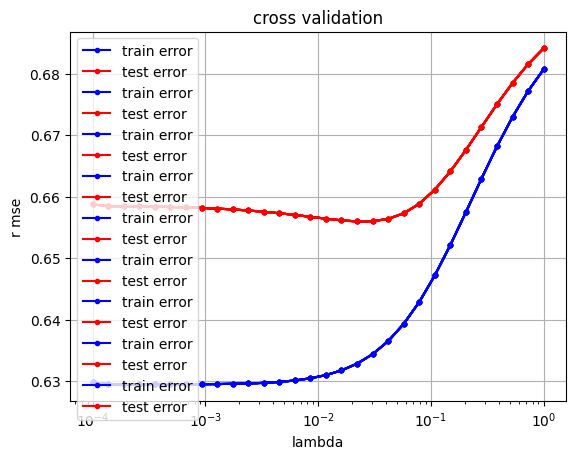

In [8]:
number_of_elements = 1000

for i in range(number_of_elements):
    if i % 100 == 0:
        print(i)
    best_lambda, best_rmse = cross_validation_demo(y_reduced, tx_reduced, 7, 4, initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters)
    print(best_rmse)#Here should be the code that does the computation.

print('Done')

In [8]:
# Construct the matrix with the polynomial expansion for each column
size_x_tr = x_tr.shape[0]
gamma = 0.4 #Quite low to avoid NaN
lambdas = np.logspace(-2, -1.8, 20) #the lambda tested for the logistic regression, for each lambda we test each degree
initial_w = np.ones([size_x_tr,1])
max_iters = 20
degrees_tested = [1,2,3,5,6,8] #the degrees tested for the polynoms
phi, degrees_poly =phi_optimized(y_tr,x_tr,degrees_tested,P, 4, initial_w, lambdas, gamma,max_iters)

print(phi.size)

/Users/toye/Desktop/ML_project1-master-2/implementations.py:229: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
/Users/toye/Desktop/ML_project1-master-2/implementations.py:246: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/toye/Desktop/ML_project1-master-2/implementations.py:246: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )


131200


In [14]:
print(phi.shape)

(800, 164)


In [ ]:
print(phi)

[[ 1.00000000e+00  2.79461775e-01  7.80988834e-02 ... -1.88929641e-01
   1.08409364e-01 -6.22061750e-02]
 [ 1.00000000e+00  2.35253288e-01  5.53441097e-02 ... -5.25419251e-02
   1.96792243e-02 -7.37072094e-03]
 [ 1.00000000e+00  1.07930230e-01  1.16489346e-02 ... -6.69295427e-01
   5.85450899e-01 -5.12109812e-01]
 ...
 [ 1.00000000e+00  3.37122645e-01  1.13651678e-01 ... -1.12013161e+00
   1.16330092e+00 -1.20813396e+00]
 [ 1.00000000e+00  1.28808884e-01  1.65917287e-02 ...  1.17633427e-03
   1.24176953e-04  1.31084472e-05]
 [ 1.00000000e+00  1.96725426e-01  3.87008931e-02 ... -1.11038501e+00
   1.14982422e+00 -1.19066425e+00]]


For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00010 with a test rmse of nan


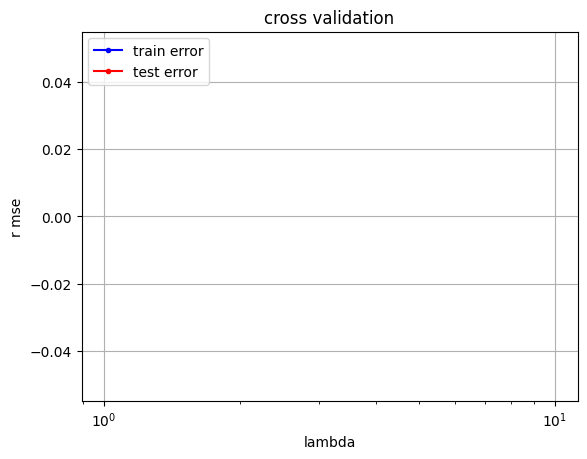

In [9]:
#Here : problems NaN with cross_validation... Possible solutions : réduire le pas gamma ? ajouter un tout petit epsilon pour eviter la division par 0, verifier qu'on introduit pas un NaN avec la data

new_size = np.sum(degrees_poly)  +1  #size of the new input data 
initial_w = np.ones([new_size,1]) 
best_lambda, best_rmse = cross_validation_demo(y_tr, phi, 7, 4,initial_w,  np.logspace(-4, 0, 30), 3 ,gamma, max_iters ) #test for the best lambda, in the matrix expanded


In [10]:
#Calculate the weights for the best lambda, with the train data
gamma = 0.2
w_opt,loss = reg_logistic_regression(y_tr, phi, best_lambda, initial_w, max_iters, gamma)

print (w_opt)

[[-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-5.23337297e-02]
 [-1.04393606e-01]
 [-1.15848377e-02]
 [-6.42027875e-01]
 [ 1.07831959e+00]
 [-3.25051763e-01]
 [-5.45188702e-01]
 [-1.55004698e+00]
 [-2.88812258e+00]
 [ 5.81835783e+00]
 [-1.07931859e-01]
 [-5.01588084e-01]
 [-1.23320295e+00]
 [-2.30980869e+00]
 [ 2.89429063e+00]
 [-5.33466173e-02]
 [-9.78246315e-02]
 [-3.42442371e-01]
 [-3.58539543e-01]
 [ 6.51435499e-01]
 [-2.85636875e-02]
 [ 2.50693975e-02]
 [-1.27740879e-02]
 [ 6.34489734e-02]
 [ 2.01623270e-01]
 [-3.32908804e-02]
 [-5.83919591e-03]
 [ 2.41464336e-01]
 [ 3.71372327e-02]
 [ 1.86328096e-02]
 [ 5.20052701e-02]
 [ 5.20046452e-01]
 [-5.84380834e-02]
 [ 3.83481891e-03]
 [-1.66635789e-01]
 [-2.20139472e-01]
 [-6.55516843e-01]
 [-1.66137793e+00]
 [ 9.18293298e-02]
 [ 2.59129306e-01]
 [ 1.18500954e+00]
 [-1.34190229e-02]
 [-1.30847939e-02]
 [-5.46454504e-02]
 [-4.16048523e-01]
 [-3.2246723

In [21]:
degrees_poly = np.array(degrees_poly)
print(degrees_poly.shape)
print (w_opt)

phi_te = np.ones([x_te.shape[0],1]) 
for column in range (1,x_te.shape[1]) :  #shape -1 car degree ne prend pas en compte la colonne de uns
    new_cols = build_poly(x_te[:,column], degrees_poly[column-1])
    phi_te = np.c_[phi_te,new_cols]

(30,)
[[-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-4.98140348e-02]
 [-5.23337297e-02]
 [-1.04393606e-01]
 [-1.15848377e-02]
 [-6.42027875e-01]
 [ 1.07831959e+00]
 [-3.25051763e-01]
 [-5.45188702e-01]
 [-1.55004698e+00]
 [-2.88812258e+00]
 [ 5.81835783e+00]
 [-1.07931859e-01]
 [-5.01588084e-01]
 [-1.23320295e+00]
 [-2.30980869e+00]
 [ 2.89429063e+00]
 [-5.33466173e-02]
 [-9.78246315e-02]
 [-3.42442371e-01]
 [-3.58539543e-01]
 [ 6.51435499e-01]
 [-2.85636875e-02]
 [ 2.50693975e-02]
 [-1.27740879e-02]
 [ 6.34489734e-02]
 [ 2.01623270e-01]
 [-3.32908804e-02]
 [-5.83919591e-03]
 [ 2.41464336e-01]
 [ 3.71372327e-02]
 [ 1.86328096e-02]
 [ 5.20052701e-02]
 [ 5.20046452e-01]
 [-5.84380834e-02]
 [ 3.83481891e-03]
 [-1.66635789e-01]
 [-2.20139472e-01]
 [-6.55516843e-01]
 [-1.66137793e+00]
 [ 9.18293298e-02]
 [ 2.59129306e-01]
 [ 1.18500954e+00]
 [-1.34190229e-02]
 [-1.30847939e-02]
 [-5.46454504e-02]
 [-4.16048523e-01]
 [-3.2

In [22]:
print(phi_te.shape)
print(phi.shape)
print(degrees_poly)


(200, 164)
(800, 164)
[6 5 5 5 5 5 3 5 5 3 5 5 6 2 3 6 8 5 6 8 3 8 5 8 5 8 8 3 6 8]
[[ 1.00000000e+00  4.84149683e-01  2.34400916e-01 ...  1.63827524e+02
   3.83222806e+02  8.96428848e+02]
 [ 1.00000000e+00  8.66842632e-02  7.51416149e-03 ...  3.60972553e-09
  -1.41379534e-10  5.53731090e-12]
 [ 1.00000000e+00  2.15760241e-01  4.65524816e-02 ...  1.86525941e-09
   6.54428864e-11  2.29607279e-12]
 ...
 [ 1.00000000e+00  3.65369380e-01  1.33494784e-01 ...  8.09261464e-02
  -5.32235294e-02  3.50040649e-02]
 [ 1.00000000e+00  1.71431742e-01  2.93888421e-02 ...  1.04956419e-05
   1.55302044e-06  2.29797521e-07]
 [ 1.00000000e+00  1.98714735e-01  3.94875458e-02 ...  1.39041254e+00
  -1.46892951e+00  1.55188035e+00]]


In [23]:
def get_accuracy(y_predictions, y_te):
    """Checks whether prediction are accurate by compraing with y_te
    
    Args: 
        predictions:
        y_te:
    
    Returns:
        len(good_guess):
        len(bad_guess):
    """ 
    
    difference = (y_predictions-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    print(len(good_guess),len(bad_guess))
    
    return len(good_guess), len(bad_guess)

In [25]:

temporary = sigmoid(phi_te@w_opt)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
right, wrong = get_accuracy(y_result, y_te)
print(right/(right+wrong))



98 102
0.49


/Users/toye/Desktop/ML_project1-master-2/implementations.py:229: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
